In [86]:
# %pip install captcha 
# %pip install opencv-python
# !apt update && apt install -y libsm6 libxext6
# !pip install opencv-python-headless
# !pip install opencv-contrib-python-headless
# %pip install keras

import cv2 as cv
import argparse
import json
import string
import os
import shutil
import uuid
from captcha.image import ImageCaptcha
from pathlib import Path

import itertools

import os
import cv2
import numpy as np
from random import random, randint, choices

import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
import matplotlib.pyplot as plt

In [56]:
alphabet_all = list('qwertyupasdfghjkzxcvbnm23456789QWERTYUPKJHGFDSAZXCVBNM')
alphabet = list('qwertyupasdfghjkzxcvbnm23456789')#QWERTYUIOPLKJHGFDSAZXCVBNM')
num_alphabet = len(alphabet)
def _gen_captcha(img_dir, num_of_letters, num_of_repetition, width, height):
    if os.path.exists(img_dir):
        shutil.rmtree(img_dir)
    if not os.path.exists(img_dir):
        os.makedirs(img_dir)

    image = ImageCaptcha(width=width, height=height)

    for idx, counter in enumerate(range(num_of_repetition)):
        i = choices(alphabet_all, k=5)
        captcha = ''.join(i)
        fn = os.path.join(img_dir, '%s_%s.png' % (captcha, uuid.uuid4()))
        image.write(captcha, fn)
#         print(f"{idx:06d}")


def gen_dataset(path, num_of_repetition, num_of_letters, width, height):
    _gen_captcha(os.path.join(path, 'data'), num_of_letters, num_of_repetition, width, height)
    print('Finished Data Generation')

In [57]:
BATCH_SIZE = 128
NUM_OF_LETTERS = 4
EPOCHS = 50
IMG_ROW, IMG_COLS = 50, 135

# Non-configs
PATH = os.getcwd()
DATA_PATH = os.path.join(PATH, 'train')

In [58]:
def load_data(path, test_split=0.1):
    print ('loading dataset...')
    y_train = []
    y_test = []
    x_train = []
    x_test = []

    # r=root, d=directories, f = files
    counter = 0
    for r, d, f in os.walk(path):
        for fl in f:
            if '.png' in fl and not any(x in fl for x in 'il1IL1oO'):
                flr = fl.split('.')[0]
                print(flr)
                counter += 1
                label = np.zeros((NUM_OF_LETTERS, num_alphabet))
                for i in range(NUM_OF_LETTERS):
                    label[i, alphabet.index(flr[i].lower())] = 1
#                 label = np.zeros((50, 1))
#                 for i in range(5):
#                     label[i*5+int(flr[i])] = 1

                img = cv2.imread(os.path.join(r, fl))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (int(135/2), int(50/2)), interpolation=cv2.INTER_AREA)
                img = np.reshape(img, (img.shape[0], img.shape[1], 1))

                if random() < test_split:
                    y_test.append(label)
                    x_test.append(img)
                else:
                    y_train.append(label)
                    x_train.append(img)

    print('dataset size:', counter, '(train=%d, test=%d)' % (len(y_train), len(y_test)))
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [59]:
x_train, y_train, x_test, y_test = load_data(DATA_PATH)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

loading dataset...
MSaRcC
tT7VTf
cA5czc
arT8V
xQFPk
tHJ6K
8Ef2by
e5fUE6
rZGGVq
3C9C7m
7dW3m
FYKh
CSV2
KMKByn
6VcQ2
wGJ2u
vg9FTa
sdsF9
5qRgv
7vQTW
UvAJ
UsGmrQ
JJsKZ
z8gWca
HFSN
XyaN
JBwTsM
Mqy6Cn
8mn5
e2Ft
wCdATk
WAZf
36xZm
eYKb
CZaY
nXAym
hfjAnY
TrwXRJ
6FpvjH
DwduAg
ZeSRnZ
CZjec
hnfx
RTHQ
seuNy
TXAcwp
Bbdjx9
KXwsk
6g66
kXNYuZ
rsRGq
xVtS
RnHb
FMFje
C2Uz24
v8CT
98kG
gRcP
D45hZ3
bb4c
eP57pK
DJNX
5gMVZ
NfS79
gS37Aj
cWRasb
rJZvDQ
Gwwsu
wbZg
7hgE
6wu2vt
5trn
4qxDc
KT2z
DNvV
GtnXk
tKBwP
nyCKZK
Dab5
sQag
zvbWn7
X5nw
GctnJT
e5eKbp
KzZc
YEYNRN
aNucW
E7Fxzr
EZxckU
M4JK
bzeUH
8Eap
EZfu
thbtB
Dc3GQ
ukDgCD
jPESG5
jNrG
UqGJ
NRKxf
K9tD
Ep7tV
8vu7RP
FxpQvN
24JnD
K4pHT
RyKkH
cmA6d
w73U49
Fcvp8J
w9X44
eGDqh
Ekmu
4nTXY
NCuU
Fg2P
tjgG
ZUh7wd
kh2Q
bZECEp
X7EXb
a3yvEY
gQJF
4G6Zz
DkkBN
9wPS
J7DPTT
hJTx
QSuAnm
STGBcY
xwuj
egjD
HxCNc
gpU8CJ
GnD5
RGpA6p
vpbr
PxF4
ejtn
KW5CvE
KEktp
Erbp
Ef9qr
jk7Nm
t256KP
agSmR
T2AY
HyNB3
7PZEf
ec7e
mFBrt
TAtTMZ
d9sp
gGwYc
eG38v
8hCtHH
XSQ9K
hhs6tY
bxQk8
FQr9W
EAsC2
R2wG
gTqs
XjC

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(689, 25, 67, 1)
(689, 4, 31)
(75, 25, 67, 1)
(75, 4, 31)


In [61]:
s_train = []
s_test = []
for i in range(NUM_OF_LETTERS):
    s_train.append(y_train[:, i, :])
    s_test.append(y_test[:, i, :])

In [62]:
save_dir = os.path.join(PATH, 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [65]:
input_layer = Input((25, 67, 1))
x = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=48, kernel_size=(5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.3)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

out = [Dense(num_alphabet, name='digit%d' % i, activation='softmax')(x) for i in range(NUM_OF_LETTERS)]
# out = Dense(num_alphabet*5, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=out)

In [66]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 25, 67, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 25, 67, 32)   832         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 12, 33, 32)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 12, 33, 48)   38448       max_pooling2d_6[0][0]            
____________________________________________________________________________________________

In [67]:
# model_path = os.path.join(save_dir, model_name)
# model = keras.models.load_model(model_path)

In [68]:
# initiate Adam optimizer

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary() 

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 25, 67, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 25, 67, 32)   832         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 12, 33, 32)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 12, 33, 48)   38448       max_pooling2d_6[0][0]            
____________________________________________________________________________________________

In [69]:
hist_train_loss_digit = {i:[] for i in range(5)}
hist_test_loss_digit = {i:[] for i in range(5)}

hist_train_acc_digit = {i:[] for i in range(5)}
hist_test_acc_digit = {i:[] for i in range(5)}

hist_train_loss = []
hist_test_loss = []

hist_train_acc = []
hist_test_acc = []

In [70]:
digit_acc = [[] for _ in range(NUM_OF_LETTERS)]
val_digit_acc = [[] for _ in range(NUM_OF_LETTERS)]
loss = []
val_loss = []

In [71]:
history = model.fit(x_train, s_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(x_test, s_test)
                   )

2021-08-30 14:12:31.527565: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
6/6 [==============================] - 2s 198ms/step - loss: 2.0424 - digit0_loss: 0.5015 - digit1_loss: 0.5013 - digit2_loss: 0.5318 - digit3_loss: 0.5079 - digit0_accuracy: 0.0319 - digit1_accuracy: 0.0305 - digit2_accuracy: 0.0232 - digit3_accuracy: 0.0261 - val_loss: 0.9997 - val_digit0_loss: 0.2452 - val_digit1_loss: 0.2474 - val_digit2_loss: 0.2397 - val_digit3_loss: 0.2674 - val_digit0_accuracy: 0.0667 - val_digit1_accuracy: 0.0133 - val_digit2_accuracy: 0.0267 - val_digit3_accuracy: 0.0267
Epoch 2/50
6/6 [==============================] - 1s 167ms/step - loss: 0.9783 - digit0_loss: 0.2392 - digit1_loss: 0.2411 - digit2_loss: 0.2438 - digit3_loss: 0.2542 - digit0_accuracy: 0.0319 - digit1_accuracy: 0.0276 - digit2_accuracy: 0.0232 - digit3_accuracy: 0.0334 - val_loss: 0.6975 - val_digit0_loss: 0.1750 - val_digit1_loss: 0.1762 - val_digit2_loss: 0.1705 - val_digit3_loss: 0.1758 - val_digit0_accuracy: 0.0133 - val_digit1_accuracy: 0.0400 - val_digit2_accuracy: 0.0400 - 

Epoch 17/50
6/6 [==============================] - 1s 162ms/step - loss: 0.5830 - digit0_loss: 0.1460 - digit1_loss: 0.1454 - digit2_loss: 0.1467 - digit3_loss: 0.1449 - digit0_accuracy: 0.0363 - digit1_accuracy: 0.0377 - digit2_accuracy: 0.0363 - digit3_accuracy: 0.0493 - val_loss: 0.5682 - val_digit0_loss: 0.1407 - val_digit1_loss: 0.1431 - val_digit2_loss: 0.1409 - val_digit3_loss: 0.1435 - val_digit0_accuracy: 0.0400 - val_digit1_accuracy: 0.0267 - val_digit2_accuracy: 0.0533 - val_digit3_accuracy: 0.0267
Epoch 18/50
6/6 [==============================] - 1s 147ms/step - loss: 0.5825 - digit0_loss: 0.1461 - digit1_loss: 0.1447 - digit2_loss: 0.1455 - digit3_loss: 0.1462 - digit0_accuracy: 0.0406 - digit1_accuracy: 0.0450 - digit2_accuracy: 0.0435 - digit3_accuracy: 0.0406 - val_loss: 0.5671 - val_digit0_loss: 0.1405 - val_digit1_loss: 0.1430 - val_digit2_loss: 0.1405 - val_digit3_loss: 0.1431 - val_digit0_accuracy: 0.0400 - val_digit1_accuracy: 0.0267 - val_digit2_accuracy: 0.0533 

Epoch 33/50
6/6 [==============================] - 1s 147ms/step - loss: 0.5769 - digit0_loss: 0.1439 - digit1_loss: 0.1442 - digit2_loss: 0.1441 - digit3_loss: 0.1447 - digit0_accuracy: 0.0421 - digit1_accuracy: 0.0406 - digit2_accuracy: 0.0377 - digit3_accuracy: 0.0290 - val_loss: 0.5670 - val_digit0_loss: 0.1409 - val_digit1_loss: 0.1428 - val_digit2_loss: 0.1400 - val_digit3_loss: 0.1433 - val_digit0_accuracy: 0.0400 - val_digit1_accuracy: 0.0267 - val_digit2_accuracy: 0.0267 - val_digit3_accuracy: 0.0133
Epoch 34/50
6/6 [==============================] - 1s 158ms/step - loss: 0.5767 - digit0_loss: 0.1441 - digit1_loss: 0.1438 - digit2_loss: 0.1442 - digit3_loss: 0.1446 - digit0_accuracy: 0.0537 - digit1_accuracy: 0.0421 - digit2_accuracy: 0.0334 - digit3_accuracy: 0.0261 - val_loss: 0.5671 - val_digit0_loss: 0.1411 - val_digit1_loss: 0.1427 - val_digit2_loss: 0.1400 - val_digit3_loss: 0.1433 - val_digit0_accuracy: 0.0400 - val_digit1_accuracy: 0.0133 - val_digit2_accuracy: 0.0533 

Epoch 49/50
6/6 [==============================] - 1s 149ms/step - loss: 0.5721 - digit0_loss: 0.1431 - digit1_loss: 0.1434 - digit2_loss: 0.1424 - digit3_loss: 0.1432 - digit0_accuracy: 0.0479 - digit1_accuracy: 0.0522 - digit2_accuracy: 0.0392 - digit3_accuracy: 0.0508 - val_loss: 0.5669 - val_digit0_loss: 0.1402 - val_digit1_loss: 0.1434 - val_digit2_loss: 0.1403 - val_digit3_loss: 0.1431 - val_digit0_accuracy: 0.0400 - val_digit1_accuracy: 0.0133 - val_digit2_accuracy: 0.1067 - val_digit3_accuracy: 0.0267
Epoch 50/50
6/6 [==============================] - 1s 145ms/step - loss: 0.5714 - digit0_loss: 0.1430 - digit1_loss: 0.1438 - digit2_loss: 0.1428 - digit3_loss: 0.1418 - digit0_accuracy: 0.0479 - digit1_accuracy: 0.0435 - digit2_accuracy: 0.0639 - digit3_accuracy: 0.0508 - val_loss: 0.5668 - val_digit0_loss: 0.1402 - val_digit1_loss: 0.1431 - val_digit2_loss: 0.1405 - val_digit3_loss: 0.1430 - val_digit0_accuracy: 0.0400 - val_digit1_accuracy: 0.0133 - val_digit2_accuracy: 0.0667 

In [72]:
digit_acc = [[] for _ in range(NUM_OF_LETTERS)]
val_digit_acc = [[] for _ in range(NUM_OF_LETTERS)]
loss = []
val_loss = []


def plot_diagram(digit_acc_now, val_digit_acc_now, loss_now, val_loss_now):
    global digit_acc, val_digit_acc, loss, val_loss
    
    
    for i in range(NUM_OF_LETTERS):
        digit_acc[i].extend(digit_acc_now[i])
        val_digit_acc[i].extend(val_digit_acc_now[i])
    loss.extend(loss_now)
    val_loss.extend(val_loss_now)
    
    for i in range(NUM_OF_LETTERS):
        s = {0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'}[i]
        # plt.plot(val_digit_acc[i], label='%s Digit Train' % s)
        plt.plot(digit_acc[i], label='%s Digit Test' % s)

    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    for i in range(NUM_OF_LETTERS):
        s = {0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'}[i]
        plt.plot(val_digit_acc[i], label='%s Digit Train' % s)
        # plt.plot(digit_acc[i], label='%s Digit Test' % s)

    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()



    # Plot training & validation loss values
    
    plt.plot(val_loss, label='Train')
    plt.plot(loss, label='Test')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

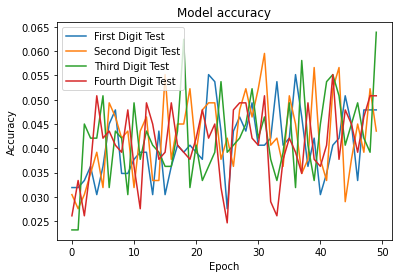

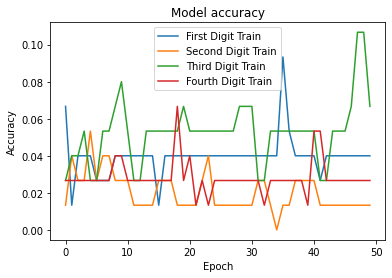

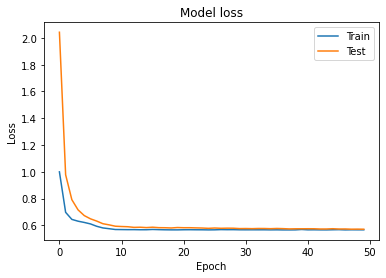

In [73]:
plot_diagram(
    
    [history.history['digit%d_accuracy' % i] for i in range(NUM_OF_LETTERS)],
    [history.history['val_digit%d_accuracy' % i] for i in range(NUM_OF_LETTERS)],
    history.history['loss'],
    history.history['val_loss'],
)

In [74]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/aalekh/deep-captcha/saved_models/keras_cifar10_trained_model.h5 


In [77]:
# Score trained model.
scores = model.evaluate(x_train, s_train, verbose=1)
print('Train loss:     %f' % np.mean(scores[0:5]))
acc = 1.
for i in range(NUM_OF_LETTERS):
    acc *= scores[NUM_OF_LETTERS+i]
print('Train accuracy: %.2f' % (acc * 100.))

22/22 [==============================] - 0s 6ms/step - loss: 0.5609 - digit0_loss: 0.1403 - digit1_loss: 0.1404 - digit2_loss: 0.1401 - digit3_loss: 0.1401 - digit0_accuracy: 0.0479 - digit1_accuracy: 0.0566 - digit2_accuracy: 0.0610 - digit3_accuracy: 0.0522
Train loss:     0.224343
Train accuracy: 0.00


In [79]:
scores = model.evaluate(x_test, s_test, verbose=1)
print('Test loss:     %f' % np.mean(scores[0:5]))
acc = 1.
for i in range(NUM_OF_LETTERS):
    acc *= scores[NUM_OF_LETTERS + 1 +i]
print('Test accuracy: %.2f' % (acc * 100.))

3/3 [==============================] - 0s 5ms/step - loss: 0.5668 - digit0_loss: 0.1402 - digit1_loss: 0.1431 - digit2_loss: 0.1405 - digit3_loss: 0.1430 - digit0_accuracy: 0.0400 - digit1_accuracy: 0.0133 - digit2_accuracy: 0.0667 - digit3_accuracy: 0.0267    
Test loss:     0.226727
Test accuracy: 0.00


## Predict Number of Digits

In [ ]:
def load_data(path, test_split=0.1):
    print ('loading dataset...')
    y_train = []
    y_test = []
    x_train = []
    x_test = []

    # r=root, d=directories, f = files
    counter = 0
    for r, d, f in os.walk(path):
        for fl in f:
            if '.png' in fl and not any(x in fl for x in 'il1IL1oO'):
                flr = fl.split('.')[0]
                print(flr)
                counter += 1
                label = np.zeros((NUM_OF_LETTERS, num_alphabet))
                for i in range(NUM_OF_LETTERS):
                    label[i, alphabet.index(flr[i].lower())] = 1
#                 label = np.zeros((50, 1))
#                 for i in range(5):
#                     label[i*5+int(flr[i])] = 1

                img = cv2.imread(os.path.join(r, fl))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (int(135/2), int(50/2)), interpolation=cv2.INTER_AREA)
                img = np.reshape(img, (img.shape[0], img.shape[1], 1))

                if random() < test_split:
                    y_test.append(label)
                    x_test.append(img)
                else:
                    y_train.append(label)
                    x_train.append(img)

    print('dataset size:', counter, '(train=%d, test=%d)' % (len(y_train), len(y_test)))
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [80]:
!pip install rembg

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 1.5 MB/s eta 0:00:01
  Using cached Flask-2.0.1-py3-none-any.whl (94 kB)
     |████████████████████████████████| 831.4 MB 15 kB/s s eta 0:00:01   |▌                               | 12.0 MB 3.3 MB/s eta 0:04:12     |██▉                             | 72.8 MB 26.0 MB/s eta 0:00:30     |████████████▍                   | 322.7 MB 12.5 MB/s eta 0:00:41     |█████████████████▊              | 461.1 MB 15.6 MB/s eta 0:00:24
     |████████████████████████████████| 22.1 MB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.0 MB/s  eta 0:00:01
  Using cached scipy-1.7.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
     |████████████████████████████████| 49 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 34.6 MB 6.4 MB/s eta 0:00:012
  Using cached click-8.0.1-py3-none-any.whl

In [101]:
from rembg.bg import remove
import io
from PIL import Image
import numpy as np

In [102]:
WITH_BG = Path("./images/with_bg/")
WITHOUT_BG = Path("./images/without_bg/")

In [114]:
remove(np.fromfile(WITH_BG / "1100.jpeg"))

OSError: image file is truncated (9 bytes not processed)

In [106]:
for img_src in WITH_BG.rglob('**/*'):
    ig_src = PIL.open(img_src)
    print(ig_src)
    result = remove(arr)
    print(result)
    img = Image.open(io.BytesIO(result)).convert("RGBA")
    print(img.shape)

AttributeError: module 'PIL' has no attribute 'open'

In [116]:
!ls

bg_remove.py			     images	requirements.txt  venv
Captcha_Solver_Alphanumerical.ipynb  LICENSE	saved_models
Captcha_Solver_numerical.ipynb	     README.md	train


In [121]:
import sys
from rembg.bg import remove

sys.stdout.buffer.write(remove(sys.stdin.buffer.read()))

AttributeError: 'OutStream' object has no attribute 'buffer'

In [122]:
import os

In [125]:
os.exec

AttributeError: module 'os' has no attribute 'exec'